In [1]:
import numpy as np
import cv2

from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
from os import listdir

Using TensorFlow backend.


In [2]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [3]:
def loadVggFaceModel():
    model = Sequential()
    
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    
    #from keras.models import model_from_json
    model.load_weights('D:/AI_learning/AI_data/session3/0主題應用/CNN/5Face Detection/keras-vggface-master/vgg_face_weights.h5')
    vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
    return vgg_face_descriptor


In [4]:
model = loadVggFaceModel()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
animal_pictures = "D:/AI_learning/AI_data/session3/0主題應用/CNN/3Cosine Similarity/images/animal/"
animals = dict()

for file in listdir(animal_pictures):
    animal, extension = file.split(".")
    animals[animal] = model.predict(preprocess_image(animal_pictures + '%s.jpg' % animal))[0,:]

print("animals representations retrieved successfully")

animals representations retrieved successfully


In [6]:
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return (a / (np.sqrt(b) * np.sqrt(c)))

In [7]:
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [8]:
def resize_image(source_filename):
    source = load_img(animal_pictures + source_filename)
    source = img_to_array(source)
    source = load_img(animal_pictures + source_filename, target_size=(source.shape[0]//2, source.shape[1]//2))
      
    return source

In [10]:
def compare(major, predict):
    cos = findCosineSimilarity(animals[major], animals[predict])
    euc = findEuclideanDistance(animals[major], animals[predict])
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.imshow(resize_image(major + '.jpg'))
    ax2.imshow(resize_image(predict + '.jpg'))
           
    if cos > 0.8:
        fig.text(0.57, 0.9, 'cosine similation:%.2f\n' %cos + 'EuclideanDistance:%.2f\n' %euc + 'Same person!', bbox=dict(facecolor='white', alpha=0.5))
    else:
        fig.text(0.63, 0.9, 'cosine similation:%.2f\n' %cos + 'EuclideanDistance:%.2f\n' %euc + 'Different person!', bbox=dict(facecolor='white', alpha=0.5))
    
    print('image save...')
    save_name = input('Enter the image name you want.')
    fig.savefig(save_name + '.jpg')

image save...
Enter the image name you want.24


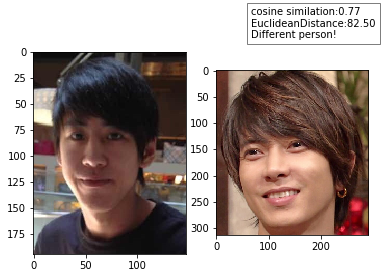

In [11]:
compare('24', '28')

image save...
Enter the image name you want.24


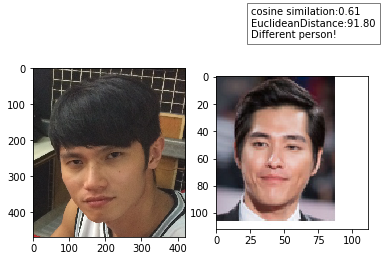

In [13]:
compare('99', '100')

image save...
Enter the image name you want.26


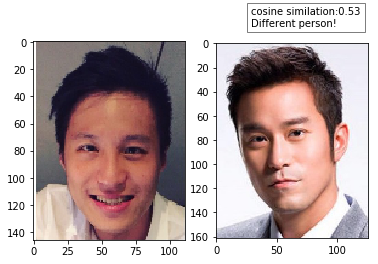

In [74]:
compare('151', '150')

image save...
Enter the image name you want.24


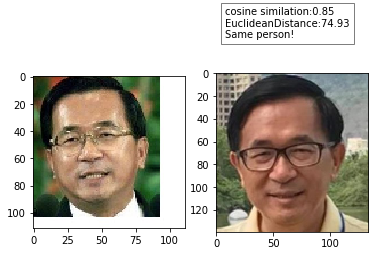

In [12]:
compare('51', '52')

cosine_similarity= 0.8504207
same person.


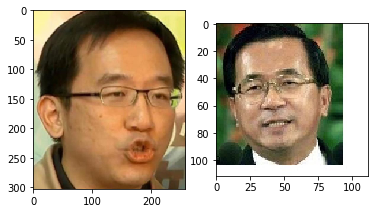

In [44]:
compare('50', '51')

image save...
Enter the image name you want.24


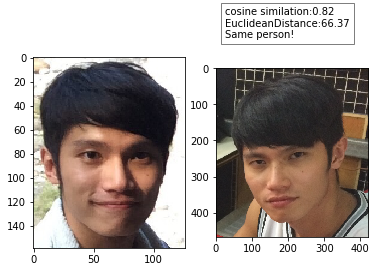

In [14]:
compare('98', '99')

image save...
Enter the image name you want.24


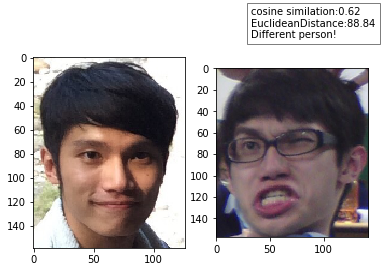

In [15]:
compare('98', '97')

In [67]:
def main():
    a = input('Enter the first picture name.')
    b = input('Enter the second picture you want to predict.')
    compare(a, b)

Enter the first picture name.24
Enter the second picture you want to predict.27
image save...
Enter the image name you want.24vs27
cosine_similarity= 0.6779215
not same.


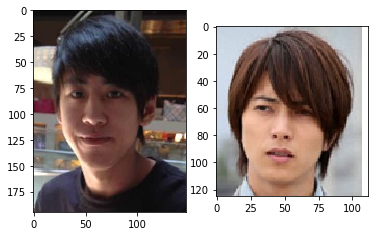

In [101]:
if __name__ == '__main__':
    main()